In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[30,15]

In [2]:
df = pd.read_csv("Dataset1.csv")

/tmp/ipykernel_6416/2149461605.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


In [3]:
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
df.dropna(subset=['BOROUGH'], inplace=True)
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]

groupingDictionary = {
    "Distraction" : ["Driver Inattention/Distraction", "Outside Car Distraction", "Passenger Distraction", "Glare", "Cell Phone (hand-held)", "Cell Phone (hands-free)", "Other Electronic Device"], 
    "Car Defects" : ["Accelerator Defective", "Brakes Defective", "Headlights Defective", "Other Lighting Defects", "Steering Failure", "Tire Failure/Inadequate", "Tow Hitch Defective", "Windshield Inadequate"],
    "Substance Abuse" : ["Alcohol Involvement", "Drugs (Illegal)", "Prescription Medication"],
    "Driver not at fault" : ["Animals Action", "Lane Marking Improper/Inadequate", "Obstruction/Debris", "Other Vehicular", "Pavement Defective", "Pavement Slippery", "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "Reaction to Other Uninvolved Vehicle", "Shoulders Defective/Improper", "Traffic Control Device Improper/Non-Working", "View Obstructed/Limited"], 
    "Driver Inexperience" : ["Driver Inexperience"], 
    "Medical/Fatigue" : ["Fatigued/Drowsy", "Fell Asleep", "Illness", "Lost Consciousness", "Physical Disability"], 
    "Traffic Rule Violation" : ["Aggressive Driving/Road Rage", "Backing Unsafely", "Failure to Keep Right", "Failure to Yield Right-Of-Way", "Following Too Closely", "Oversized Vehicle", "Passing Too Closely", "Passing or Lane Usage Improper", "Traffic Control Disregarded", "Turning Improperly", "Unsafe Lane Changing", "Unsafe Speed"]
}

In [4]:
def make_series(df: pd.DataFrame):

    df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified"]
    df1 = df1.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    df_temp1 = df1.groupby(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    s3 = df_temp1.size()

    df2 = df[df['CONTRIBUTING FACTOR VEHICLE 2'] != "Unspecified"]
    df2 = df2.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 2'])
    df_temp2 = df2.groupby(by=['CONTRIBUTING FACTOR VEHICLE 2'])
    s4 = df_temp2.size()

    df_equal = df[df['CONTRIBUTING FACTOR VEHICLE 1'] == df['CONTRIBUTING FACTOR VEHICLE 2']]
    df_equal = df_equal[df_equal['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified"]
    df_equal = df_equal.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    df_equal_temp = df_equal.groupby(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    s5 = df_equal_temp.size()
    s_total_ = s3.add(s4, fill_value=0)
    s_total = s_total_.sub(s5, fill_value=0)

    return s_total



def plot_series(s_total: pd.Series):

    bars = s_total.index
    x_pos = range(len(s_total))
    plt.bar(x_pos, s_total.values, width=0.8)
    plt.xlabel("Cause of accident", fontsize=15)
    plt.ylabel("Accidents", fontsize=15)
    plt.title("Accidents by type in New York City", fontsize=15)
    plt.xticks(x_pos, bars, rotation = 85, fontsize=15)
    plt.yticks(fontsize=15)
    for i in range(len(s_total)):
        plt.text(i, s_total.astype('int32')[i], s_total.astype('int32')[i], ha='center', bbox = dict(facecolor = 'white', alpha =.8), fontsize=15)
    plt.show()

47


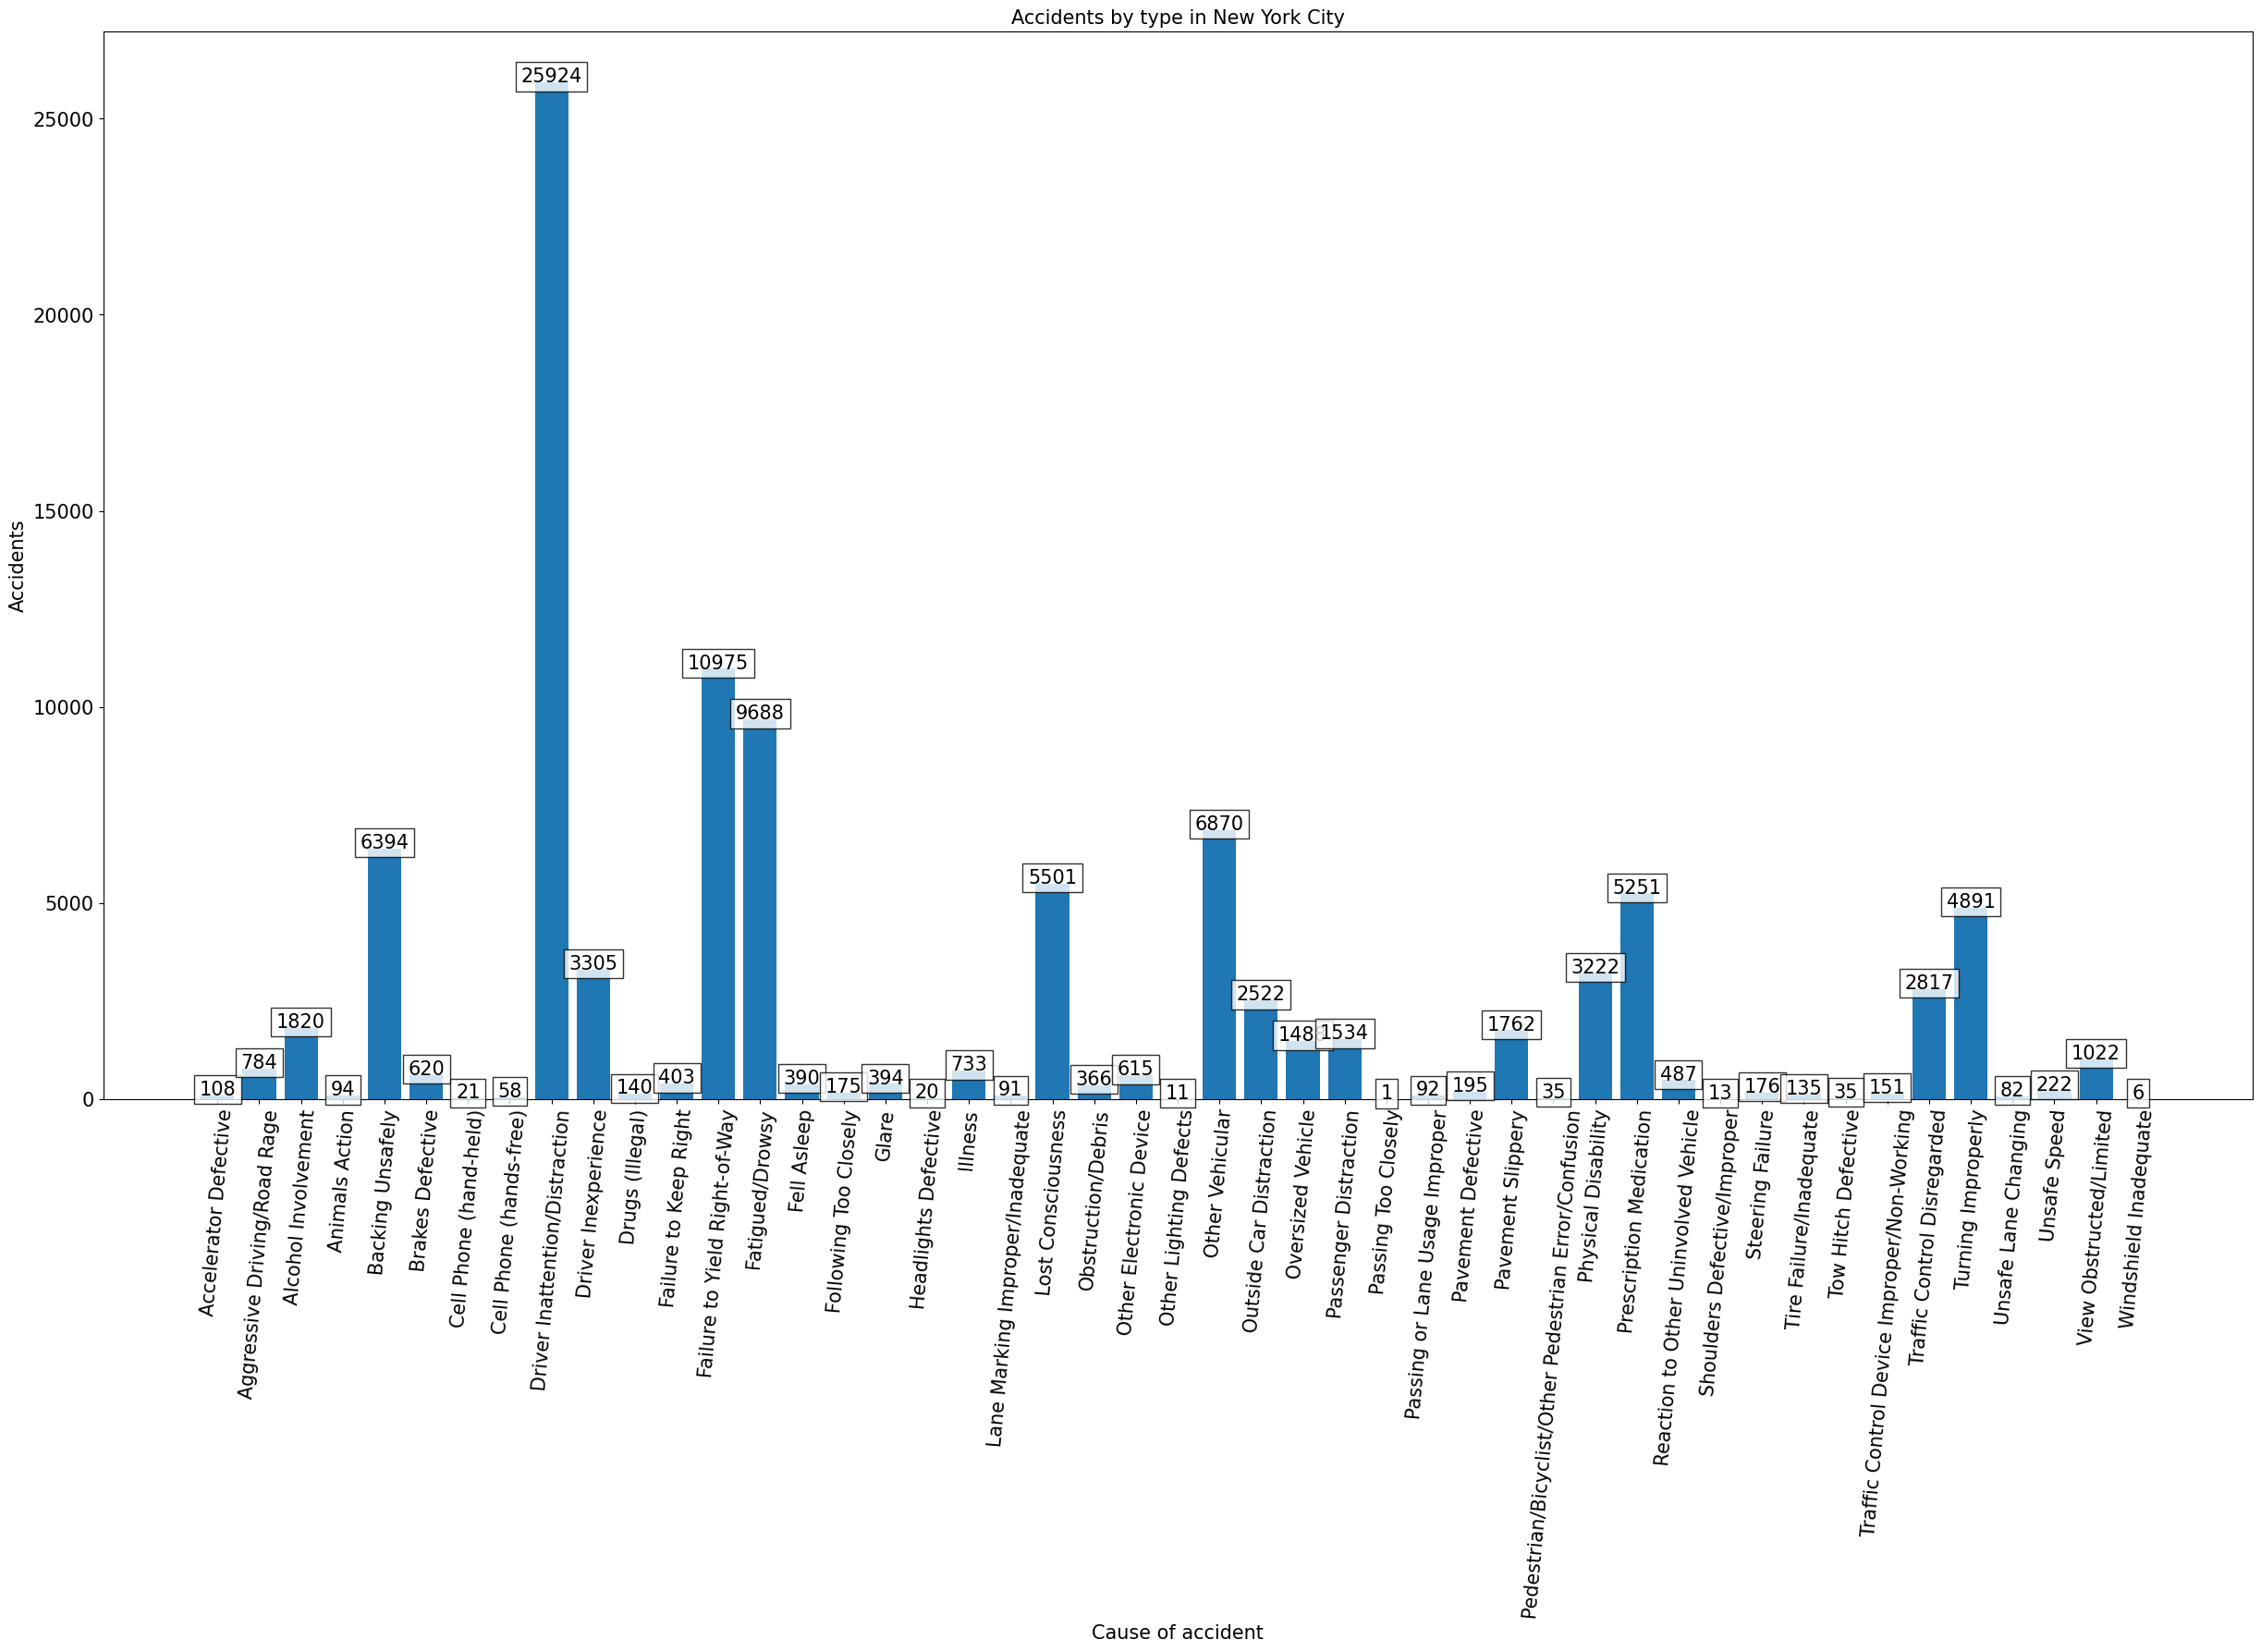

In [7]:
s = make_series(df)
plot_series(s)

/tmp/ipykernel_6416/1050132223.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


BRONX


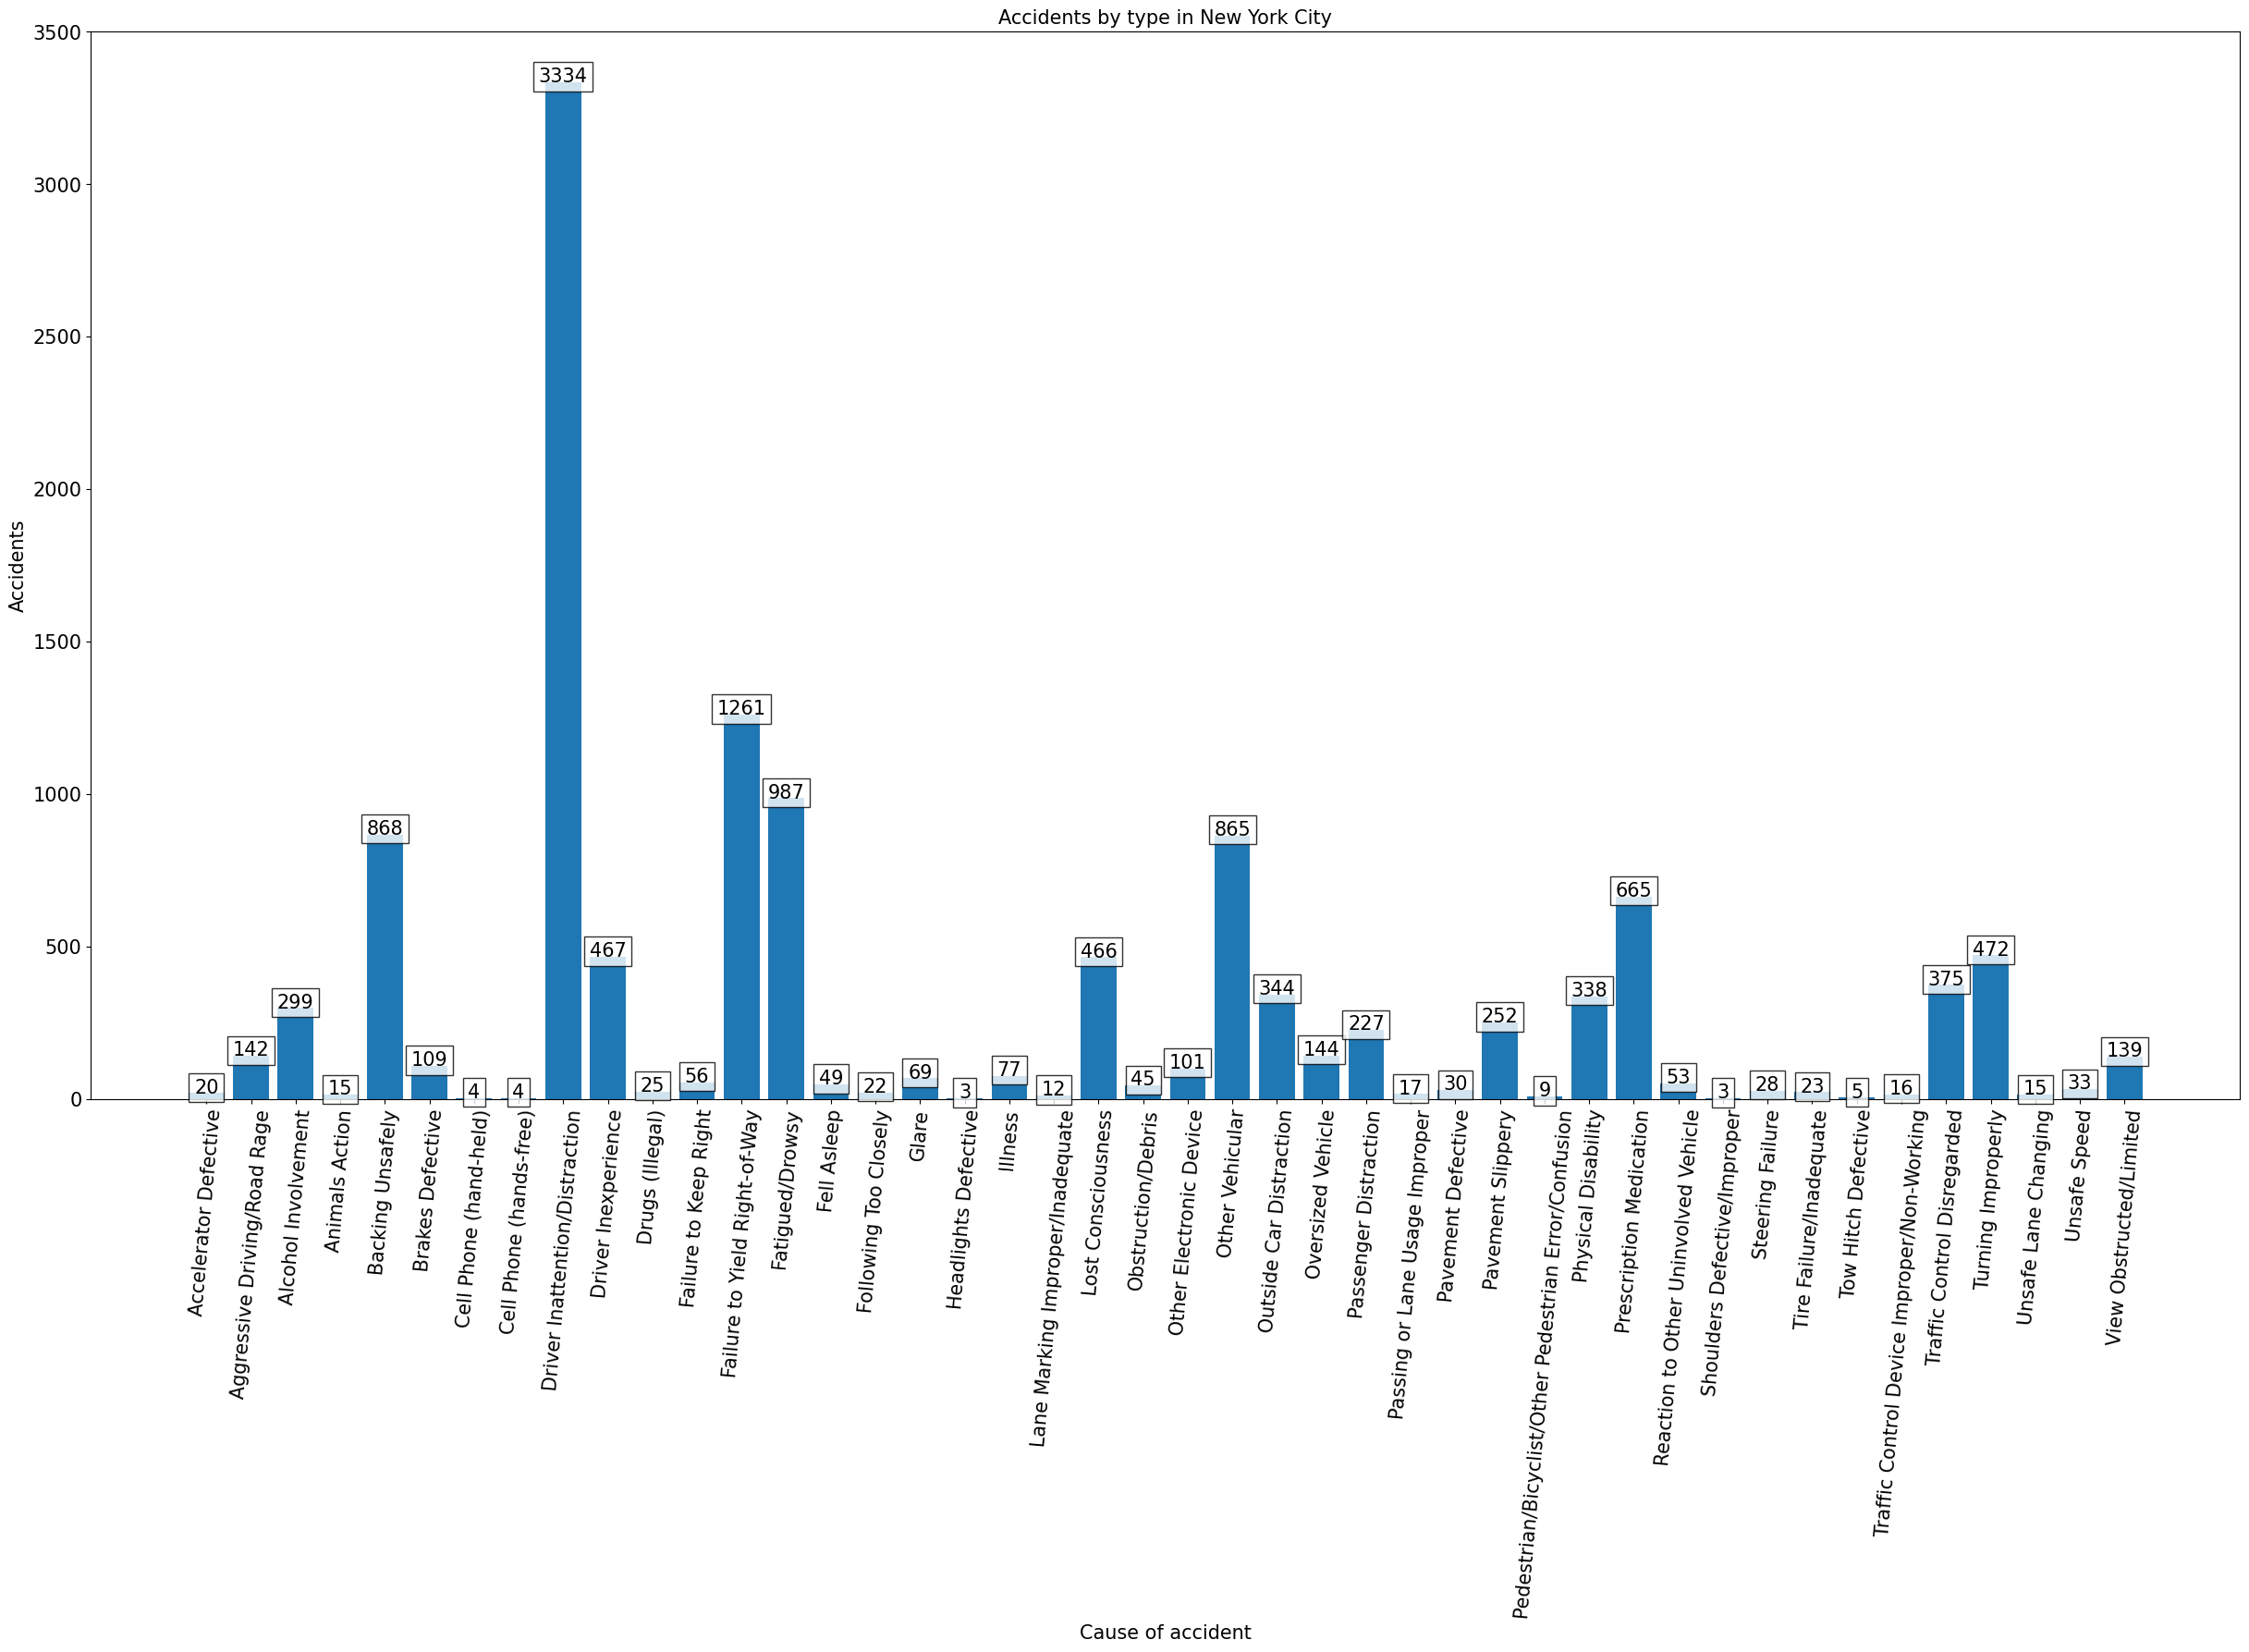

BROOKLYN


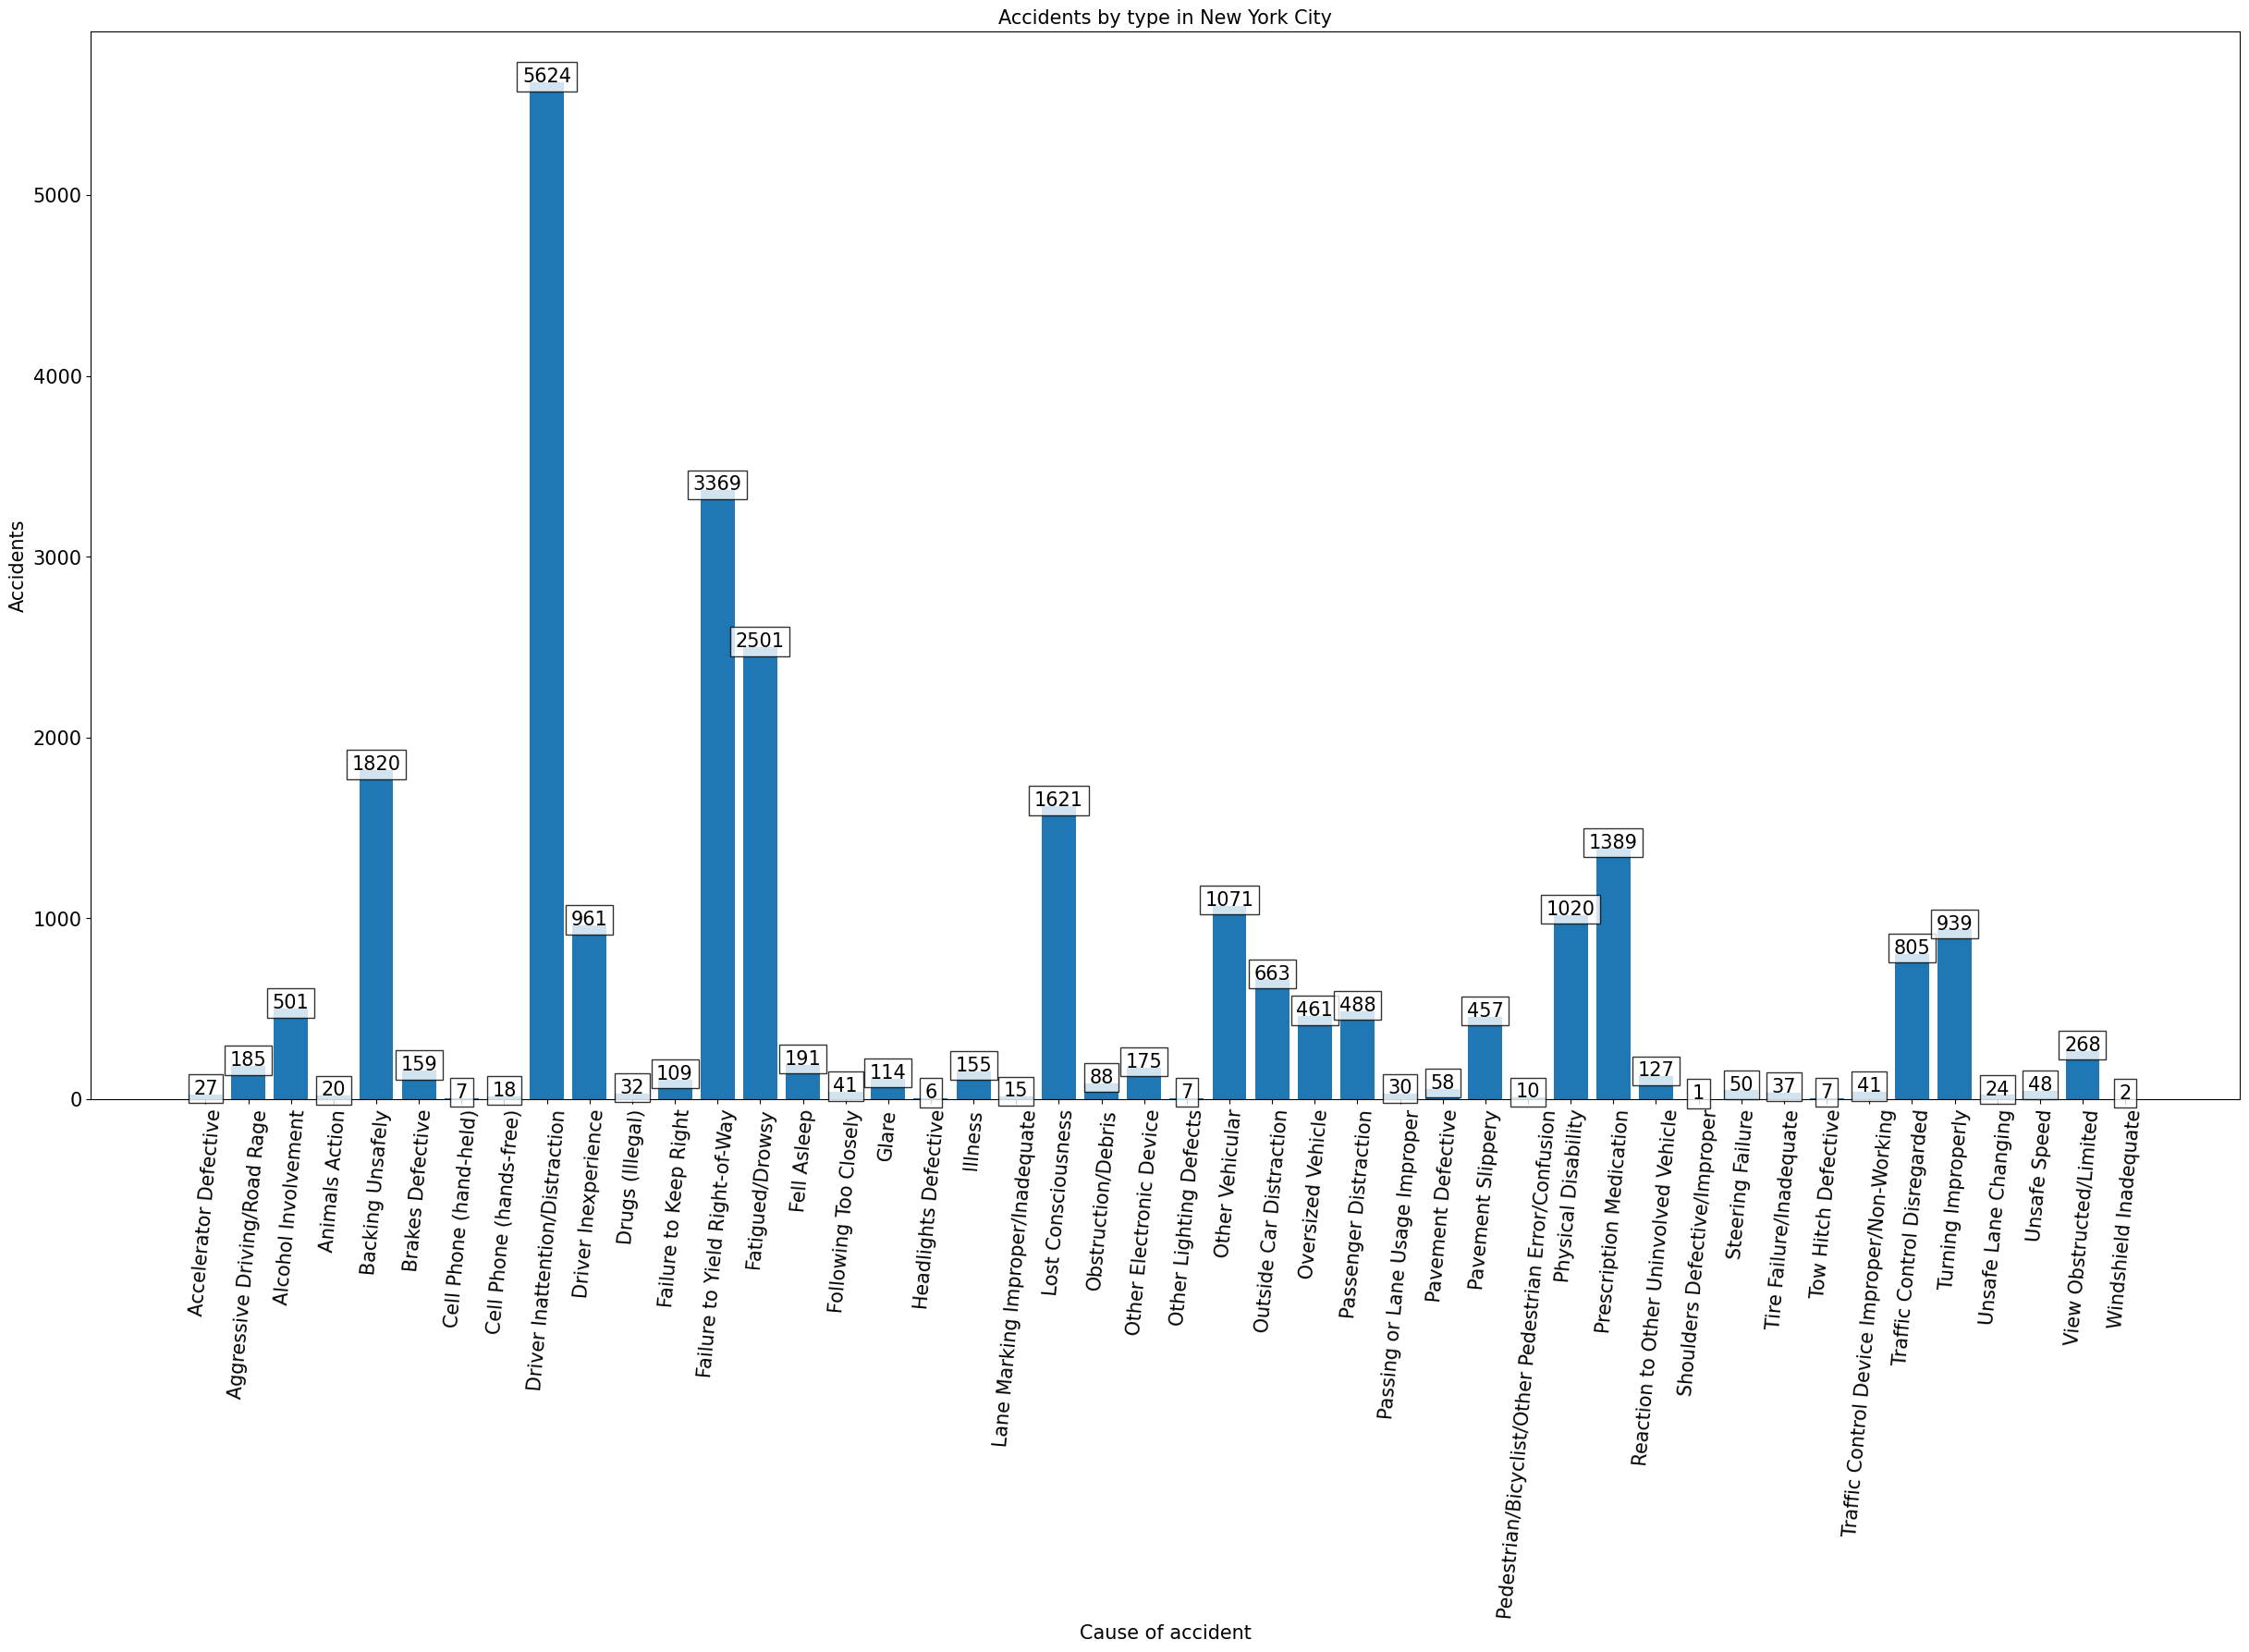

MANHATTAN


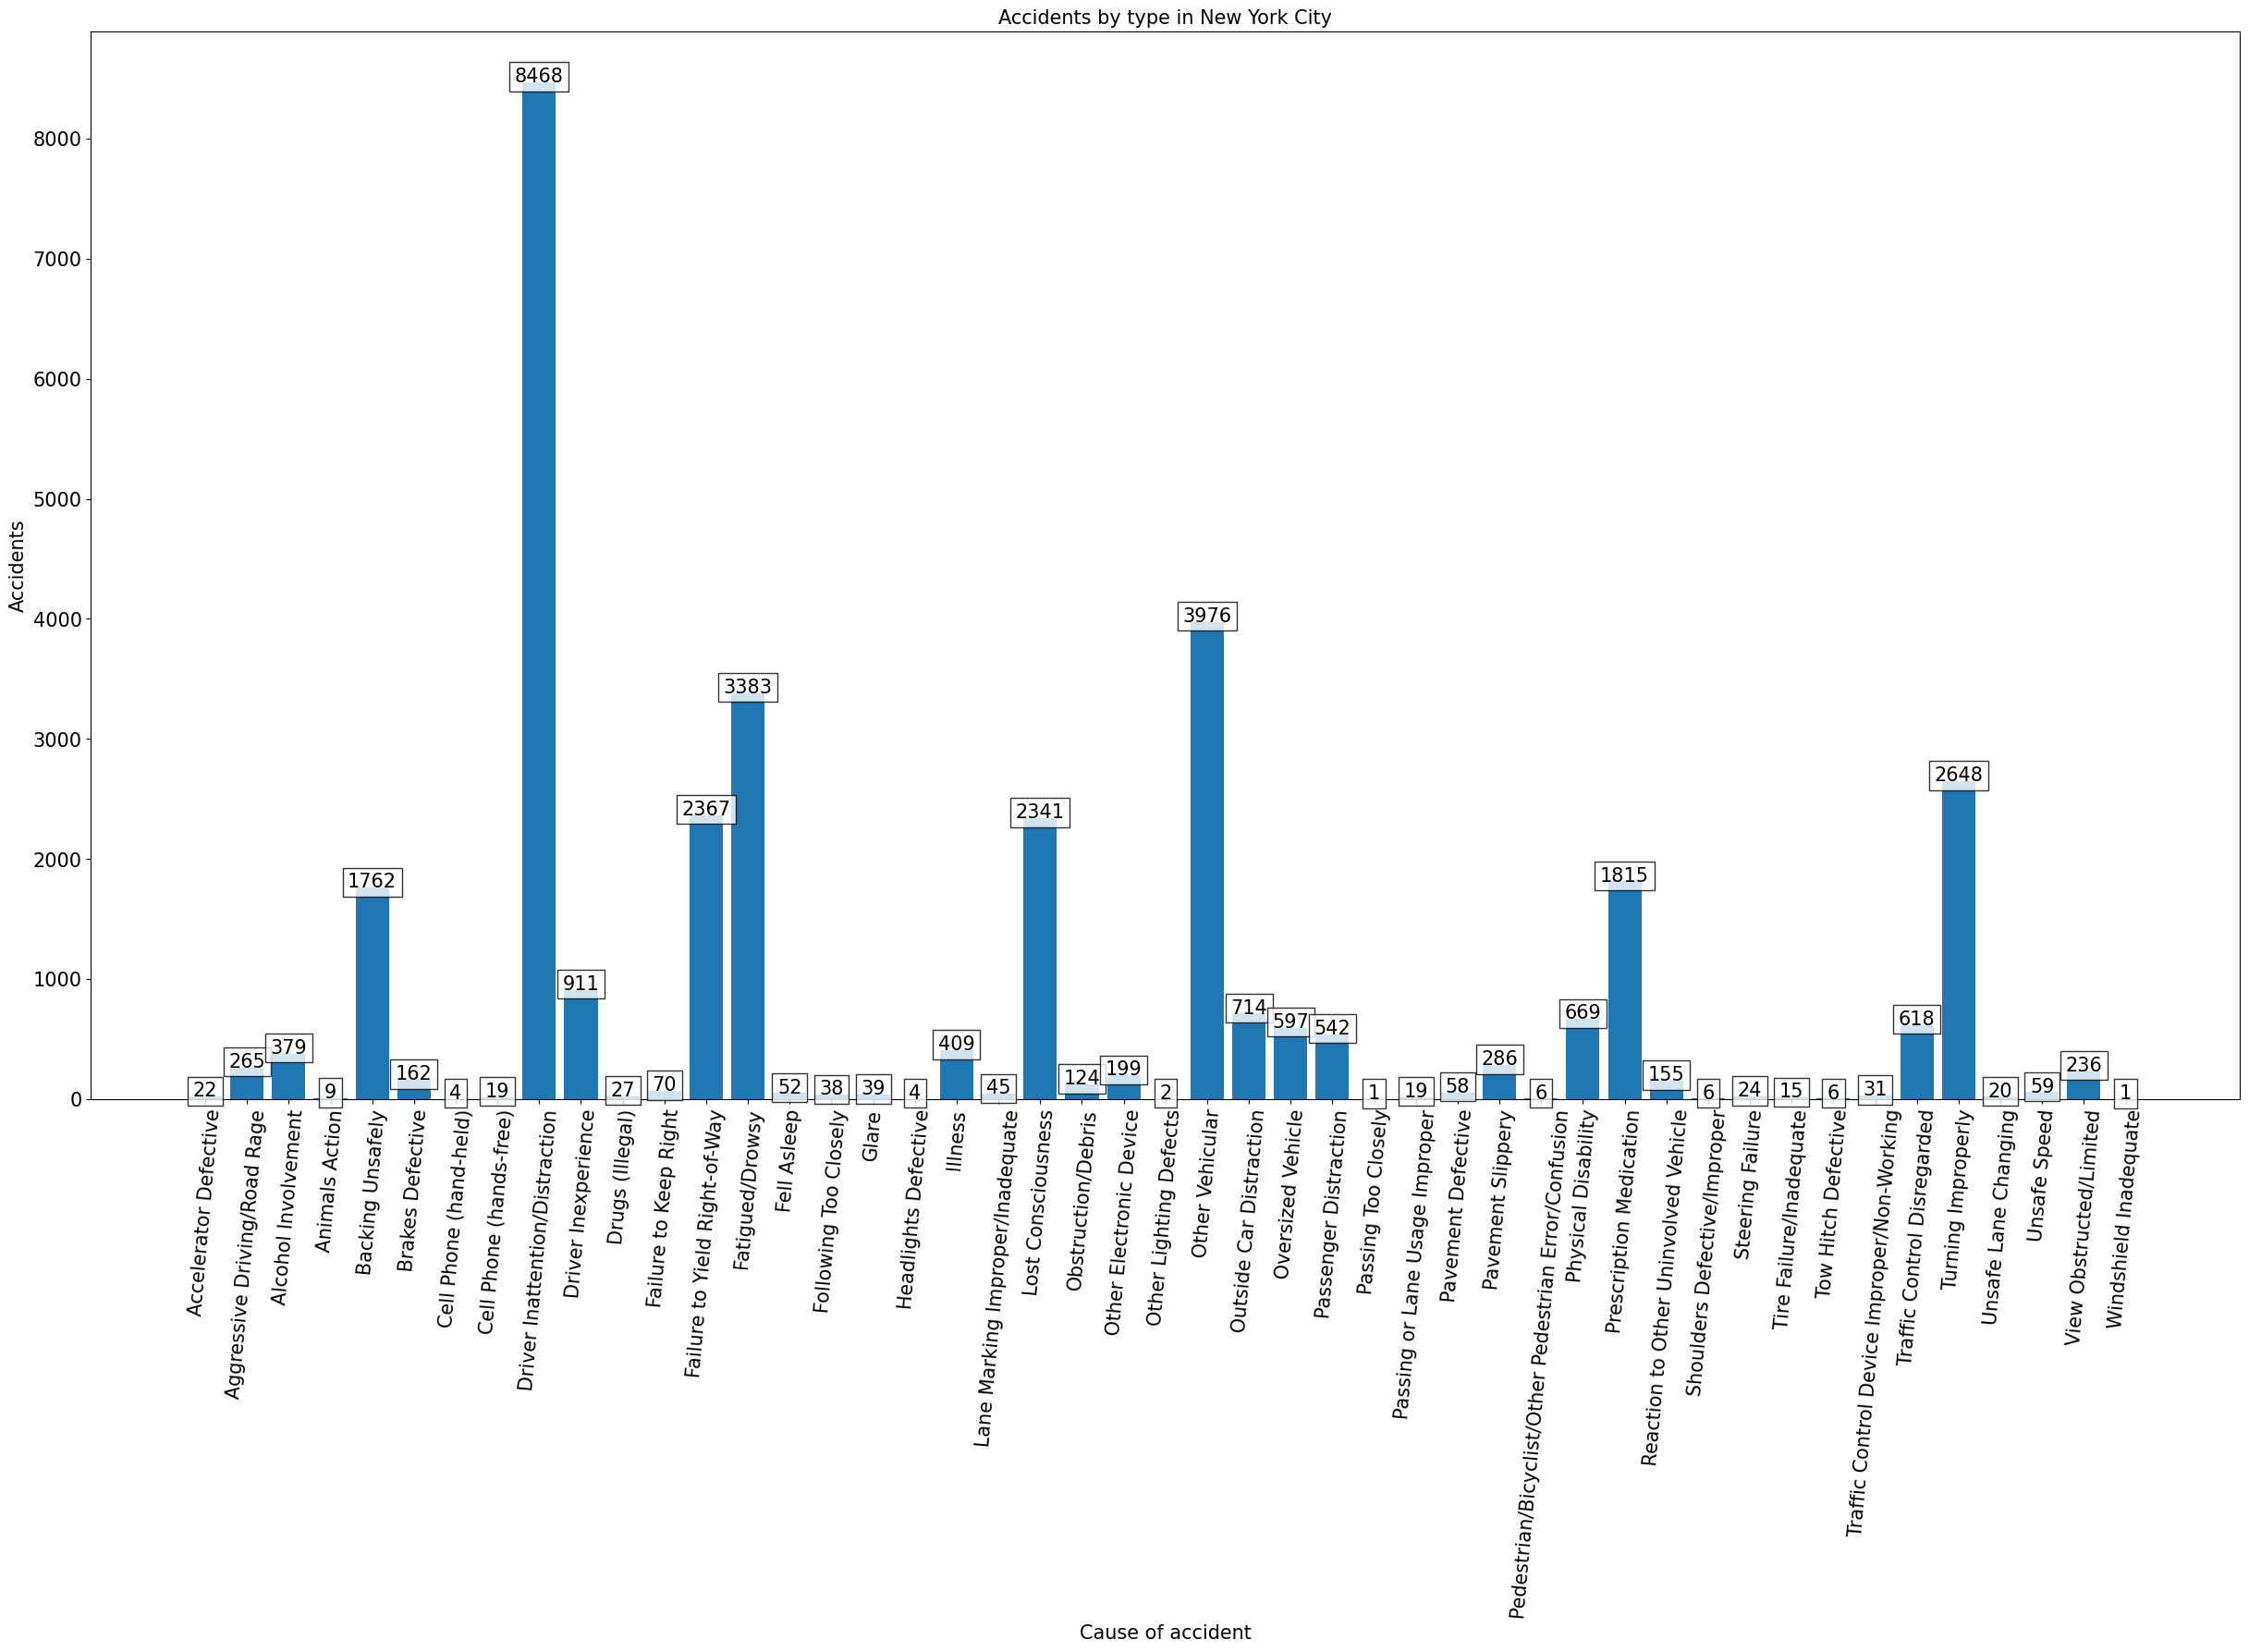

QUEENS


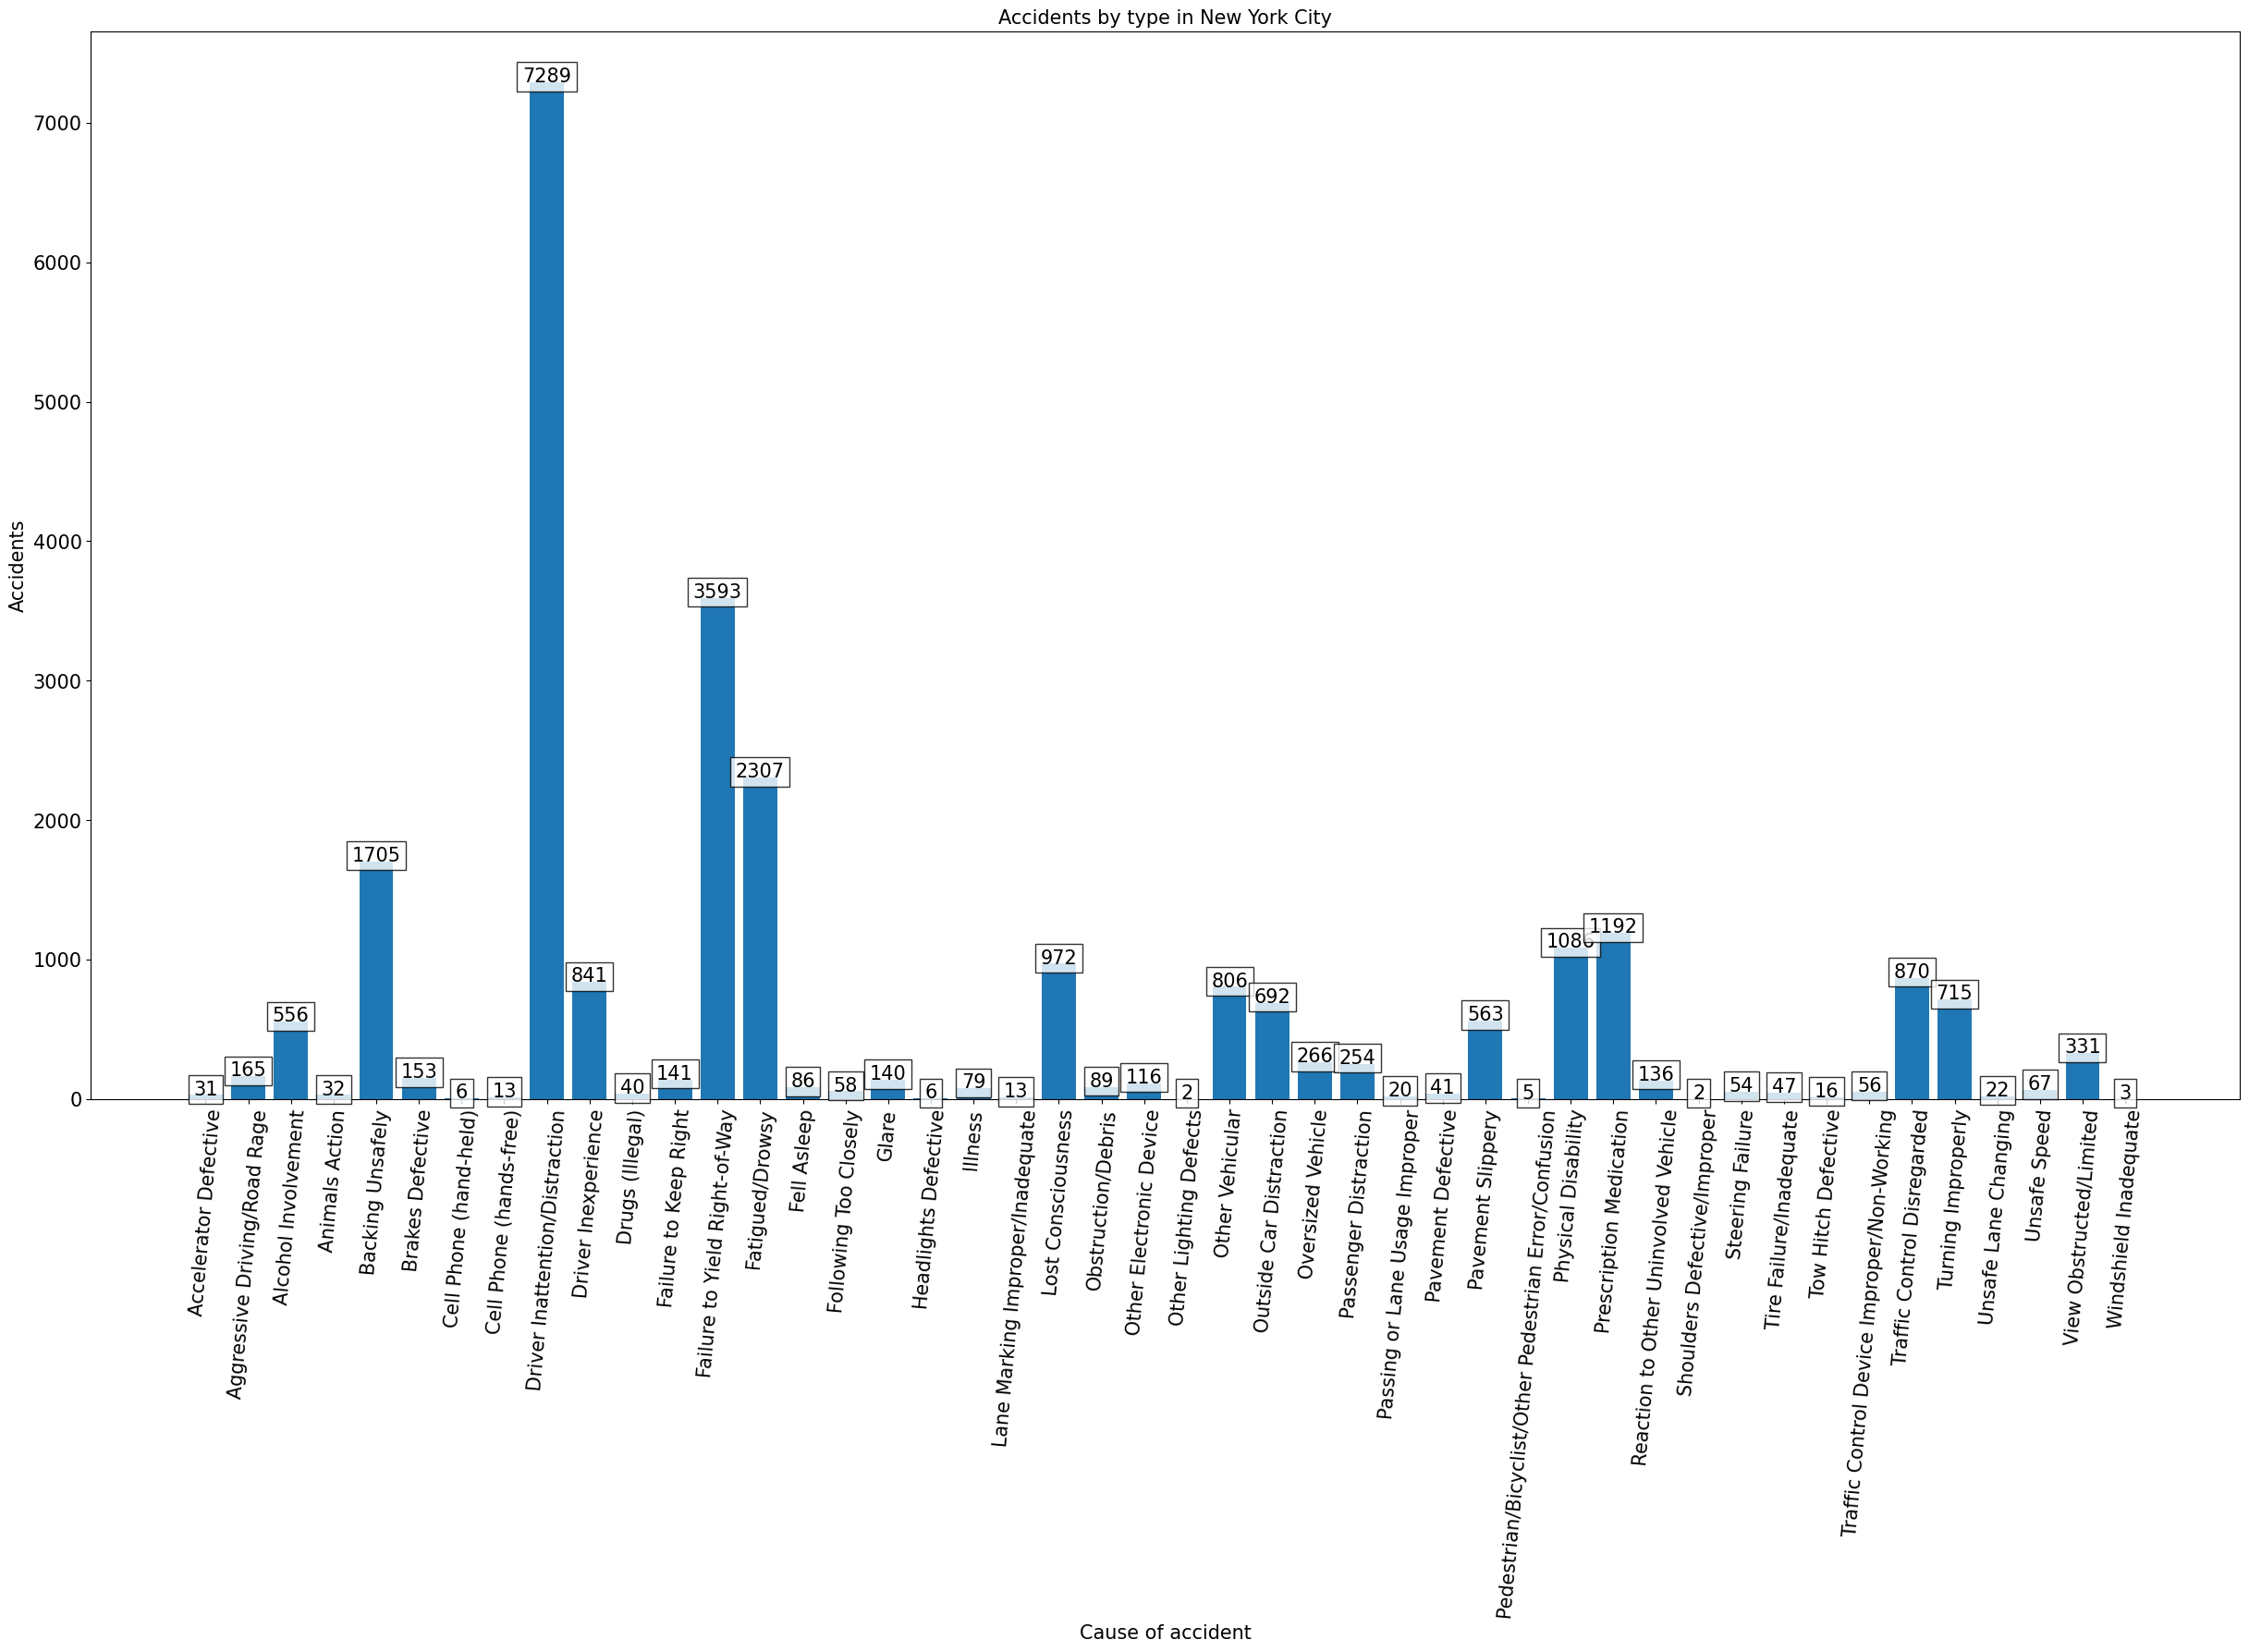

STATEN ISLAND


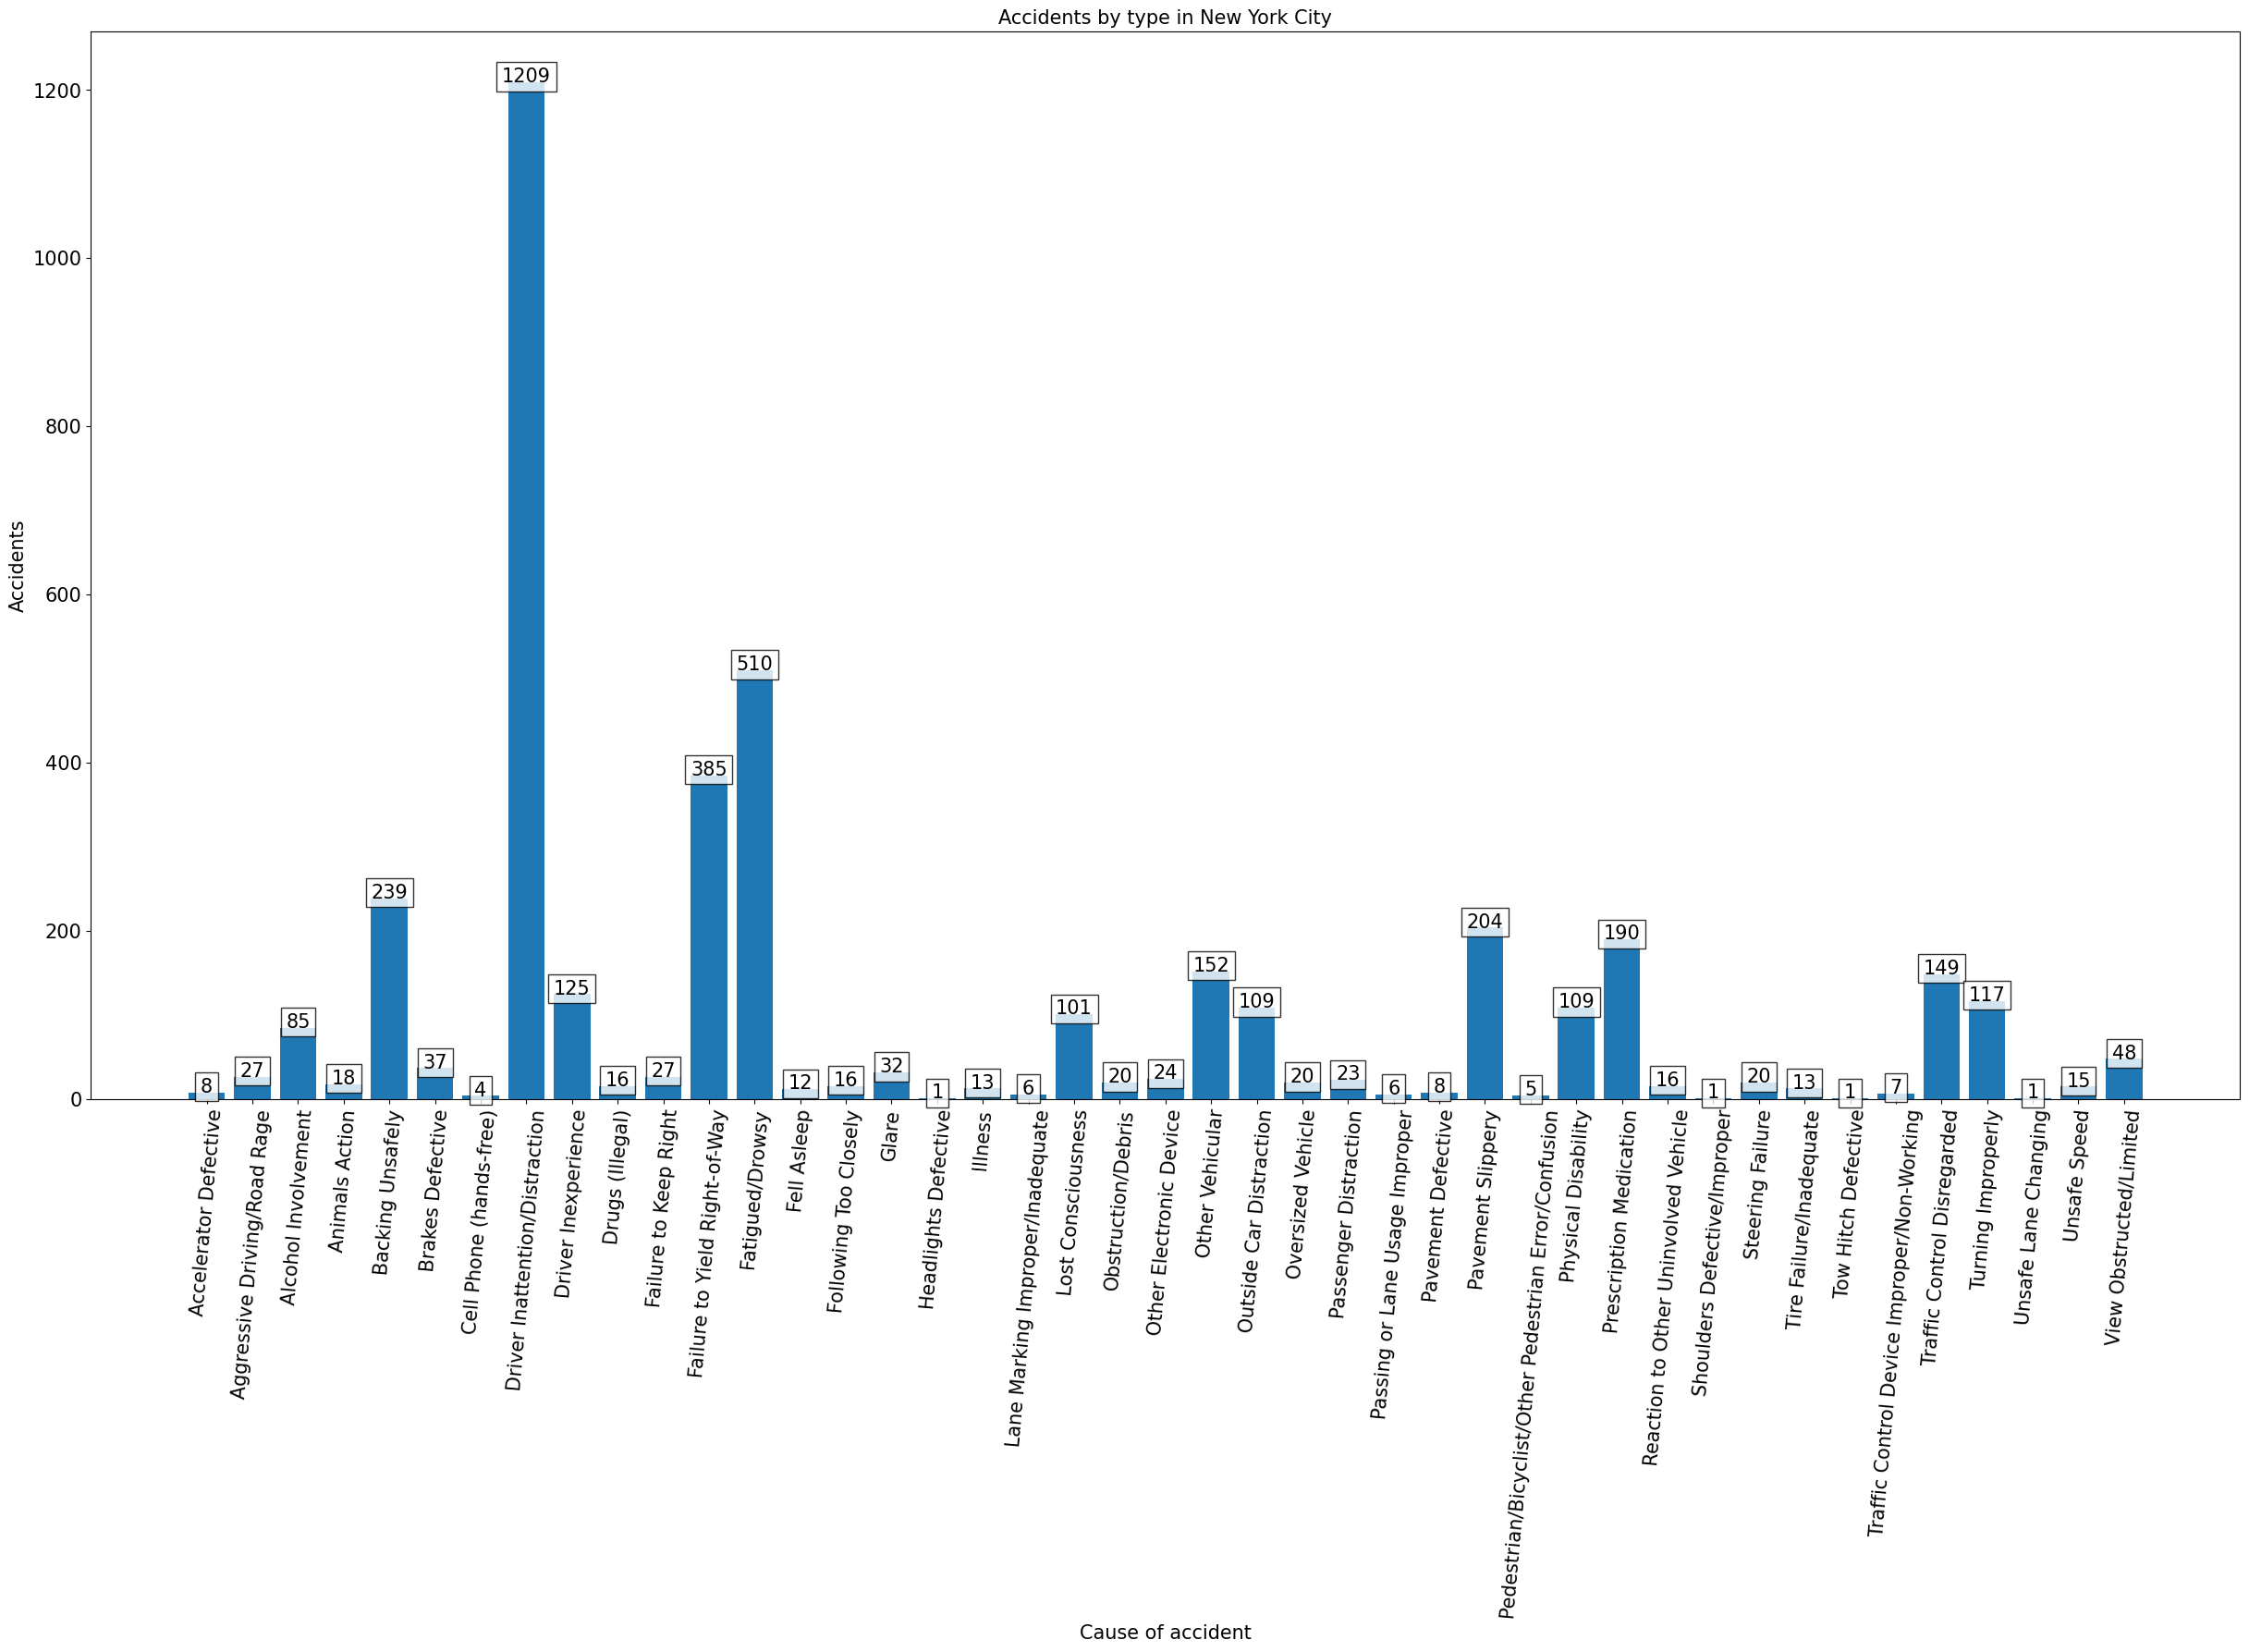

In [6]:
groups = df.groupby(by=['BOROUGH'])
for name, group in groups:
    s = make_series(group)
    print(name)
    plot_series(s)